Name: Ahmad Aljarf

Oasis Infobyte

Batch: February 2023

Task 3: CAR PRICE PREDICTION WITH MACHINE LEARNING

Importing the required libraries:

In [32]:
import pandas as pd

import numpy as np

url='https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'

df1=pd.read_csv(url)

df1


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


lets check the dataframe:

In [33]:
df1.shape

(205, 26)

In [34]:
df1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

lets check if there is any missing values

In [36]:
df1.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

preparing the data for training and testing:

In [37]:
df2=df1.drop('price', axis=1) # features
df2



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [38]:
data1=df2.values
data2 = df1['price'].values # labels

X, y = data1, data2

print(X.shape, y.shape)




(205, 25) (205,)


lets apply data preprocessing technique:

In [39]:
from sklearn.preprocessing import OneHotEncoder
X2= OneHotEncoder().fit_transform(X).toarray()

In [40]:
X2

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

lets split the data for testing and training sets:

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.30 )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 1080) (62, 1080) (143,) (62,)


lets import linear regression and train it:

In [43]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

In [44]:

linreg.fit(X_train,y_train.astype('int'))



LinearRegression()

In [45]:

y_pred=linreg.predict(X_test)
y_pred

array([ 6563.48656705, 10559.47348082,  7221.7237916 , 31998.51480256,
       10805.90527161,  6134.19458892, 18525.44284176,  9301.27385844,
       12303.66438751,  9422.3937815 , 21077.98485203, 10810.93750635,
       11904.39226148,  8516.05184998, 31191.2628489 ,  9712.04565459,
       19754.31768064,  9311.37219005, 15409.55467924, 18700.3980265 ,
        8090.69925091,  5775.1499768 , 17832.70308483, 34643.75095179,
        7878.20658376, 13014.96975431, 16879.05457002,  6416.04247412,
       32718.82714273,  6932.33525923,  5623.37018049,  7204.96268724,
        9575.75071899,  8201.40294258, 21220.01672792, 10359.14459943,
        6935.51244586,  9600.03386162,  7969.84374932,  8912.91761813,
       10607.44629303,  8777.31672922,  9788.84994152, 17366.91129266,
       12445.31454372, 10240.77632762, 15606.61000575,  6251.18995201,
       26980.06534727, 15107.24404557, 23387.62687483,  7164.00259416,
       15398.93727157,  6624.95512837, 13331.32702401, 10314.63518709,
      

In [46]:
({'Actual': y_test})

{'Actual': array([ 5572.   , 14869.   ,  5499.   , 34184.   , 14489.   ,  6795.   ,
        18420.   , 10595.   ,  9639.   ,  7126.   , 17859.167,  7775.   ,
         9298.   ,  6989.   , 35550.   , 10245.   , 24565.   ,  7295.   ,
        16430.   , 16503.   ,  9279.   ,  5195.   , 13860.   , 40960.   ,
         8249.   , 11595.   , 18920.   ,  6669.   , 37028.   ,  6849.   ,
         5389.   ,  6692.   ,  5118.   ,  8499.   , 23875.   ,  7898.   ,
         7499.   ,  9549.   , 11245.   ,  7463.   ,  7295.   ,  8195.   ,
         8495.   , 15750.   , 11694.   ,  9980.   , 16558.   ,  5348.   ,
        28248.   , 14399.   , 31400.5  ,  7999.   , 18344.   ,  7603.   ,
        16630.   ,  9989.   ,  8845.   ,  6229.   , 12170.   , 25552.   ,
         9295.   , 16500.   ])}

In [47]:

({'Predicted': y_pred})

{'Predicted': array([ 6563.48656705, 10559.47348082,  7221.7237916 , 31998.51480256,
        10805.90527161,  6134.19458892, 18525.44284176,  9301.27385844,
        12303.66438751,  9422.3937815 , 21077.98485203, 10810.93750635,
        11904.39226148,  8516.05184998, 31191.2628489 ,  9712.04565459,
        19754.31768064,  9311.37219005, 15409.55467924, 18700.3980265 ,
         8090.69925091,  5775.1499768 , 17832.70308483, 34643.75095179,
         7878.20658376, 13014.96975431, 16879.05457002,  6416.04247412,
        32718.82714273,  6932.33525923,  5623.37018049,  7204.96268724,
         9575.75071899,  8201.40294258, 21220.01672792, 10359.14459943,
         6935.51244586,  9600.03386162,  7969.84374932,  8912.91761813,
        10607.44629303,  8777.31672922,  9788.84994152, 17366.91129266,
        12445.31454372, 10240.77632762, 15606.61000575,  6251.18995201,
        26980.06534727, 15107.24404557, 23387.62687483,  7164.00259416,
        15398.93727157,  6624.95512837, 13331.32702

rounding the values predicted:

In [48]:
import math
import numpy as np
rounded = [np.round(y_pred,2)]
rounded

[array([ 6563.49, 10559.47,  7221.72, 31998.51, 10805.91,  6134.19,
        18525.44,  9301.27, 12303.66,  9422.39, 21077.98, 10810.94,
        11904.39,  8516.05, 31191.26,  9712.05, 19754.32,  9311.37,
        15409.55, 18700.4 ,  8090.7 ,  5775.15, 17832.7 , 34643.75,
         7878.21, 13014.97, 16879.05,  6416.04, 32718.83,  6932.34,
         5623.37,  7204.96,  9575.75,  8201.4 , 21220.02, 10359.14,
         6935.51,  9600.03,  7969.84,  8912.92, 10607.45,  8777.32,
         9788.85, 17366.91, 12445.31, 10240.78, 15606.61,  6251.19,
        26980.07, 15107.24, 23387.63,  7164.  , 15398.94,  6624.96,
        13331.33, 10314.64,  8694.59,  6098.06, 14729.91, 27339.45,
        11943.99, 21022.04])]

Applying some metrics to evaluate the model performance:

In [49]:
from sklearn.metrics import r2_score 

# R2(coefficient of determination) regression score function.

# R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale

print(" R2 score of linear regression: ", r2_score(y_test, y_pred))

 R2 score of linear regression:  0.9102503038338096


In [50]:
def mean_absolute_percentage_error(y_test, y_pred): 
  y_test, y_pred = np.array(y_test), np.array(y_pred) # mae is the absolute difference between the actual or true values and the values that are predicted. 
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100    #Absolute difference means that if the result has a negative sign, it is ignored.
  

In [51]:
mean_absolute_percentage_error(y_test, y_pred) 

15.99988227182717

In [52]:
print("Accuracy of linear regression: ",
      
linreg.score(X_test,y_test))

Accuracy of linear regression:  0.9102503038338096


In [53]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error # mse the average of the square of the difference between the original and predicted values of the data

mse=mean_squared_error(y_test, y_pred)

# The mean squared error
print("Mean squared error: %.2f" % mse)


Mean squared error: 6583533.84


In [56]:
from math import sqrt
                              #RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. 
rmse=sqrt(mse)                #This is the same as MSE (Mean Squared Error) but the root of the value is considered while
                              ##determining the accuracy of the moderoot_mse
rmse                                


2565.8397926173766

Plotting a line to visualize the predicted values vs the true value:

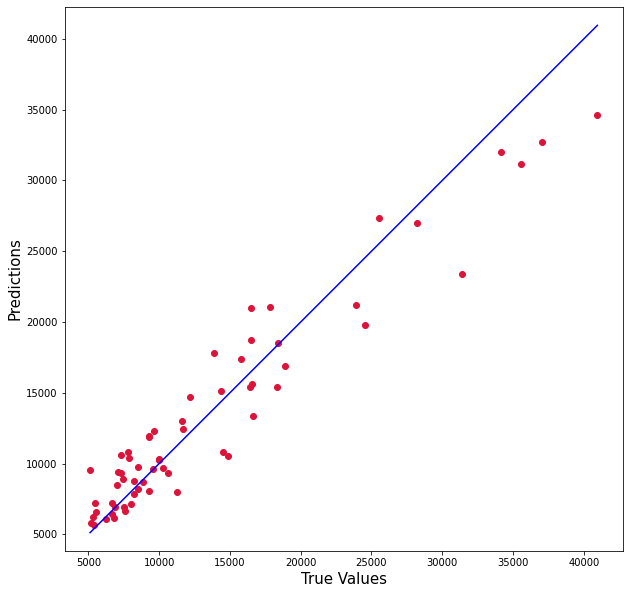

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred ,c='crimson') # more explanation about the graph below it
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


From the plot we can see that the closer the points are to the line, the more accurate the model is. It can also be used to understand if the model is under or over predicting. If points are above the blue line, the model is over predicting while if the points are below the blue line, the model is under predicting.